# Christian Campbell

# Bankruptcy Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
bankruptcy_df = pd.read_csv(r"C:\Users\chris\Documents\Bellevue University\10 - Applied Data Science\Project 1\american_bankruptcy.csv")

In [3]:
bankruptcy_df.head(20)

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,...,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,...,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,...,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,...,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,C_1,alive,2008,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,...,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


In [4]:
# Removes columns "company_name" and "year"
bankruptcy_df1 = bankruptcy_df.drop(columns=["company_name", "year"])

# Converts "alive" to 0 and "failed" to 1 in the "status_label" column
bankruptcy_df1["status_label"] = bankruptcy_df1["status_label"].replace({"alive": 0, "failed": 1})

bankruptcy_df1.head(20)

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,0,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,0,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,0,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,0,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,0,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,0,474.542,598.172,27.950,61.774,255.477,15.453,127.121,522.6794,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,0,624.454,704.081,29.222,91.877,323.592,35.163,136.272,882.6283,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,0,645.721,837.171,32.199,118.907,342.593,58.660,181.691,1226.1925,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,0,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,747.5434,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,0,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,571.5948,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


### Training, testing and evaluating the model

In [5]:
# Splits the data into features (X) and target (y)
X = bankruptcy_df1.drop(columns=["status_label"])
y = bankruptcy_df1["status_label"]

# Splits the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializes and trains the LightGBM classifier
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4152, number of negative: 58793
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 62945, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065962 -> initscore=-2.650433
[LightGBM] [Info] Start training from score -2.650433


LGBMClassifier()

In [6]:
# Predicts the target on the test set
y_pred = lgbm_model.predict(X_test)

In [7]:
# Evaluates the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [8]:
# Prints the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9343585181419585
Confusion Matrix:
[[14658    11]
 [ 1022    46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     14669
           1       0.81      0.04      0.08      1068

    accuracy                           0.93     15737
   macro avg       0.87      0.52      0.52     15737
weighted avg       0.93      0.93      0.91     15737



### Feature importance

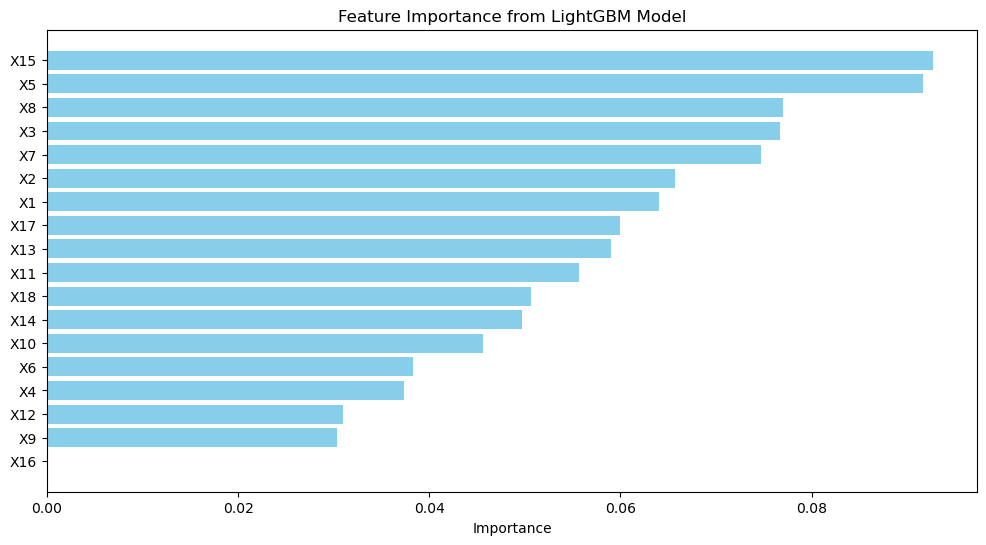

   Feature  Importance
14     X15    0.092667
4       X5    0.091667
7       X8    0.077000
2       X3    0.076667
6       X7    0.074667
1       X2    0.065667
0       X1    0.064000
16     X17    0.060000
12     X13    0.059000
10     X11    0.055667
17     X18    0.050667
13     X14    0.049667
9      X10    0.045667
5       X6    0.038333
3       X4    0.037333
11     X12    0.031000
8       X9    0.030333
15     X16    0.000000


In [9]:
# Gets feature importance from the trained model
importance = lgbm_model.feature_importances_

# Creates a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Normalizes the importance values to be between 0 and 1
feature_importance_df['Importance'] = feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()

# Sorts the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance as a bar chart
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from LightGBM Model')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Display the ranked table of feature importance
print(feature_importance_df)